# 互评作业1:数据探索性分析与数据预处理

**姓名**：杨毅哲

**学号**：3120201088

**GitHub**：https://github.com/YangPatrick/DataMining

## 数据集选择
- [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews)：
  - 该数据集是关于葡萄酒评价的数据，共有三个数据文件:
    - winemag-data-130k-v2.csv：包含10列和130k行关于葡萄酒的评价
    - winemag-data_first150k.csv：包含10列和150k行关于葡萄酒的评价
    - winemag-data-130k-v2.json：保护6919个关于葡萄酒评价的节点
  - 本次数据挖掘试验选取的是winemag-data_first150k.csv数据
- [MLB Pitch Data 2015-2018](https://www.kaggle.com/pschale/mlb-pitch-data-20152018)
  - 该数据集是美国职业棒球大联盟的数据，共有五个数据文件：
    - atbats.csv：棒球打数数据文件
    - ejections.csv：棒球抛球数据文件
    - games.csv：棒球比赛数据文件
    - pitches.csv：棒球数据文件
    - player_name.csv：运动员数据文件
  - 本次数据挖掘试验选取所有的数据文件进行分析

## 数据分析要求

### 数据可视化与摘要

- 数据摘要
  - 标称属性，给出每个聚会的频数
  - 数值属性，给出5数概括以及缺失值的个数
- 数据可视化
  - 使用直方图、盒图等检查数据分布及离群点

### 数据缺失的处理

观察数据集中缺失的数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理：

- 将缺失部分剔除
- 使用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

注意：在处理后，要可视化地对比新旧数据集

## 包引用

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. 数据分析之Wine Reviews
### 1.1 数据加载

In [2]:
wine_review_dataset = pd.read_csv('winemag-data_first150k.csv')

### 1.2 数据可视化和摘要
#### 1.2.1 数据信息概览
进行数据分析之前，对数据信息进行概览性预览是必要的。

In [3]:
wine_review_dataset.info()
wine_review_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


可以看出，该数据中的属性有11种，其中标称属性有8种，分别是：

- country
- description
- designation
- province
- region_1
- region_2
- variety
- winery

数值属性2种（忽略Unnamed），分别是：

- points
- price

#### 1.2.2 标称属性数据摘要和可视化

**标称属性摘要**：考虑获得标称属性，对其进行频数统计并摘要，为了避免显示太多的数据，只显示top10的标称属性值及其对应的频次和比例。

**标称属性可视化**：考虑获得的标称属性，对其进行频数统计并用直方图进行可视化，为了避免现实太多数据，只显示top10的标称数值及其频次直方图

**注1**：由于description属性值过长且没有统计意义，因此不对其进行统计展示，因此只有7种标称属性参与统计

**注2**：为了可以多次复用，定义一个针对标称属性可视化和统计的函数`analyse_nominal_attribute`

In [4]:
def analyse_nominal_attribute(data, attribute, top=10):
    column_data = data[attribute].value_counts()
    num_item = len(column_data)
    count_value = len(data.index)
    data_frame = column_data.to_frame()
    data_frame['频次'] = column_data.apply(lambda x: x / count_value)
    data_frame.rename(columns={attribute: '数量'}, inplace=True)
    top_value_list = list(column_data.index)[:top]
    print(f'属性：{attribute}')
    print(f'属性值有{num_item}种，其中top{top}种为 '+', '.join(top_value_list))
    print('把这些属性的频次展示如下')
    print(data_frame.iloc[:top])
    print('把这些属性的统计分布展示如下')
    plt.figure(figsize=(10, 10)) 
    plt.bar(top_value_list, column_data.iloc[:top])
    plt.title(f'{attribute}属性的top{top}分布')
    plt.xticks(rotation=45)
    plt.show()

属性：country
属性值有48种，其中top10种为 US, Italy, France, Spain, Chile, Argentina, Portugal, Australia, New Zealand, Austria
把这些属性的频次展示如下
                数量        频次
US           62397  0.413417
Italy        23478  0.155556
France       21098  0.139787
Spain         8268  0.054780
Chile         5816  0.038534
Argentina     5631  0.037309
Portugal      5322  0.035261
Australia     4957  0.032843
New Zealand   3320  0.021997
Austria       3057  0.020254
把这些属性的统计分布展示如下


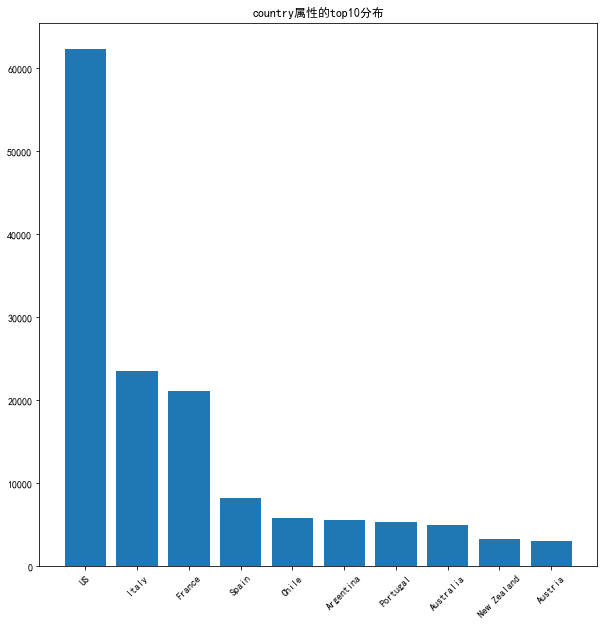

In [5]:
attribute = 'country'
analyse_nominal_attribute(wine_review_dataset,attribute)

属性：designation
属性值有30621种，其中top10种为 Reserve, Reserva, Estate, Barrel sample, Riserva, Barrel Sample, Brut, Crianza, Estate Grown, Estate Bottled
把这些属性的频次展示如下
                  数量        频次
Reserve         2752  0.018234
Reserva         1810  0.011992
Estate          1571  0.010409
Barrel sample   1326  0.008786
Riserva          754  0.004996
Barrel Sample    639  0.004234
Brut             624  0.004134
Crianza          503  0.003333
Estate Grown     449  0.002975
Estate Bottled   396  0.002624
把这些属性的统计分布展示如下


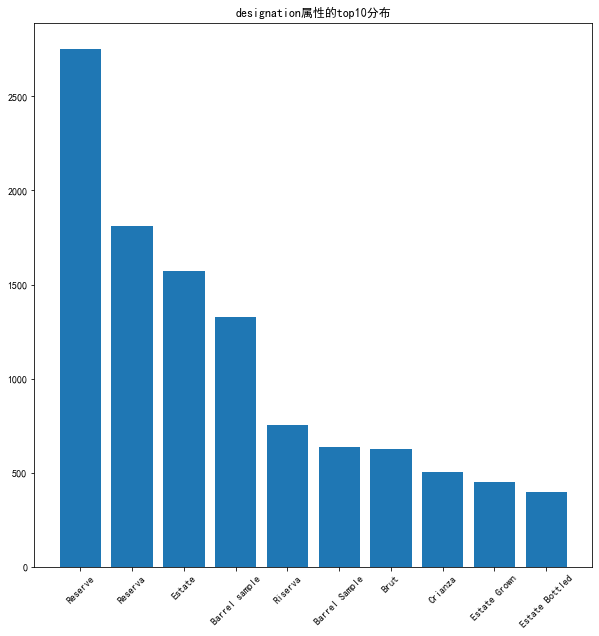

In [6]:
attribute = 'designation'
analyse_nominal_attribute(wine_review_dataset,attribute)

属性：province
属性值有455种，其中top10种为 California, Washington, Tuscany, Bordeaux, Northern Spain, Mendoza Province, Oregon, Burgundy, Piedmont, Veneto
把这些属性的频次展示如下
                     数量        频次
California        44508  0.294892
Washington         9750  0.064599
Tuscany            7281  0.048241
Bordeaux           6111  0.040489
Northern Spain     4892  0.032412
Mendoza Province   4742  0.031419
Oregon             4589  0.030405
Burgundy           4308  0.028543
Piedmont           4093  0.027119
Veneto             3962  0.026251
把这些属性的统计分布展示如下


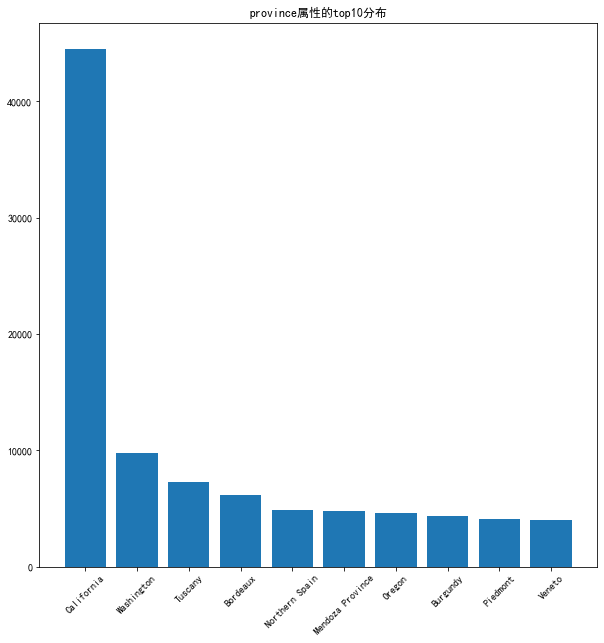

In [7]:
attribute = 'province'
analyse_nominal_attribute(wine_review_dataset,attribute)

属性：region_1
属性值有1236种，其中top10种为 Napa Valley, Columbia Valley (WA), Mendoza, Russian River Valley, California, Paso Robles, Willamette Valley, Rioja, Toscana, Sonoma County
把这些属性的频次展示如下
                        数量        频次
Napa Valley           6209  0.041138
Columbia Valley (WA)  4975  0.032962
Mendoza               3586  0.023759
Russian River Valley  3571  0.023660
California            3462  0.022938
Paso Robles           3053  0.020228
Willamette Valley     2096  0.013887
Rioja                 1893  0.012542
Toscana               1885  0.012489
Sonoma County         1853  0.012277
把这些属性的统计分布展示如下


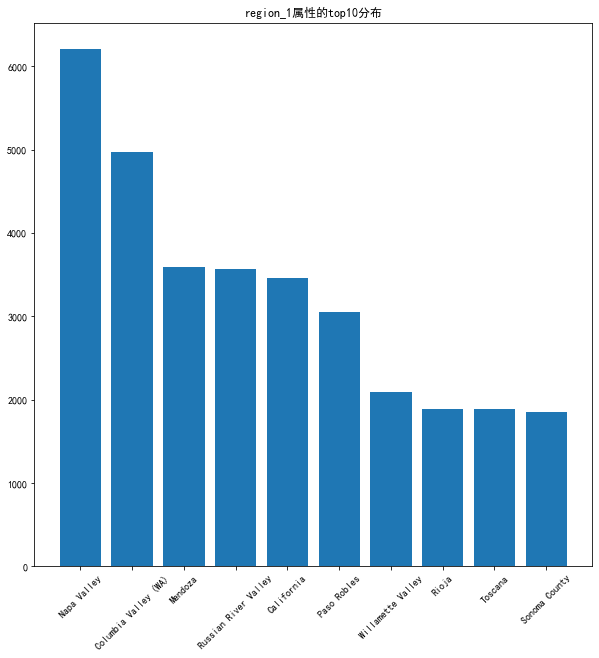

In [8]:
attribute = 'region_1'
analyse_nominal_attribute(wine_review_dataset,attribute)

属性：region_2
属性值有18种，其中top10种为 Central Coast, Sonoma, Columbia Valley, Napa, California Other, Willamette Valley, Mendocino/Lake Counties, Sierra Foothills, Napa-Sonoma, Finger Lakes
把这些属性的频次展示如下
                            数量        频次
Central Coast            13057  0.086510
Sonoma                   11258  0.074591
Columbia Valley           9157  0.060671
Napa                      8801  0.058312
California Other          3516  0.023296
Willamette Valley         3181  0.021076
Mendocino/Lake Counties   2389  0.015829
Sierra Foothills          1660  0.010998
Napa-Sonoma               1645  0.010899
Finger Lakes              1510  0.010005
把这些属性的统计分布展示如下


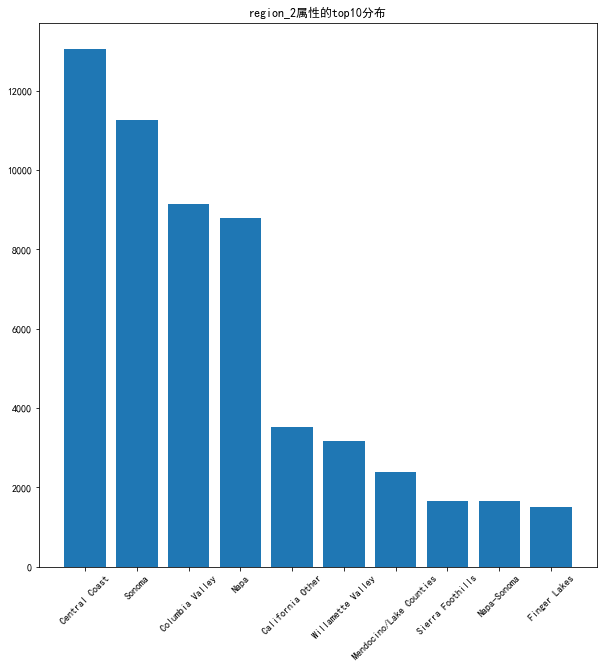

In [9]:
attribute = 'region_2'
analyse_nominal_attribute(wine_review_dataset,attribute)

属性：variety
属性值有632种，其中top10种为 Chardonnay, Pinot Noir, Cabernet Sauvignon, Red Blend, Bordeaux-style Red Blend, Sauvignon Blanc, Syrah, Riesling, Merlot, Zinfandel
把这些属性的频次展示如下
                             数量        频次
Chardonnay                14482  0.095952
Pinot Noir                14291  0.094686
Cabernet Sauvignon        12800  0.084808
Red Blend                 10062  0.066667
Bordeaux-style Red Blend   7347  0.048678
Sauvignon Blanc            6320  0.041874
Syrah                      5825  0.038594
Riesling                   5524  0.036600
Merlot                     5070  0.033592
Zinfandel                  3799  0.025171
把这些属性的统计分布展示如下


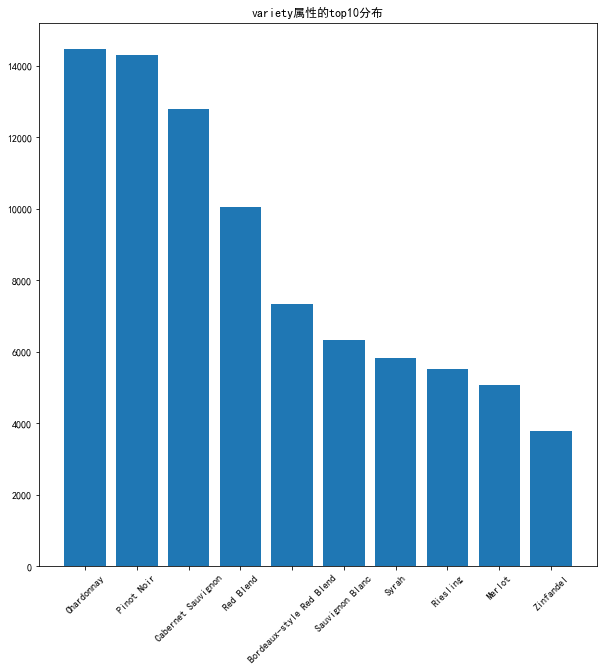

In [10]:
attribute = 'variety'
analyse_nominal_attribute(wine_review_dataset,attribute)

属性：winery
属性值有14810种，其中top10种为 Williams Selyem, Testarossa, DFJ Vinhos, Chateau Ste. Michelle, Columbia Crest, Concha y Toro, Kendall-Jackson, Trapiche, Bouchard Père & Fils, Kenwood
把这些属性的频次展示如下
                        数量        频次
Williams Selyem        374  0.002478
Testarossa             274  0.001815
DFJ Vinhos             258  0.001709
Chateau Ste. Michelle  225  0.001491
Columbia Crest         217  0.001438
Concha y Toro          216  0.001431
Kendall-Jackson        216  0.001431
Trapiche               205  0.001358
Bouchard Père & Fils   203  0.001345
Kenwood                191  0.001265
把这些属性的统计分布展示如下


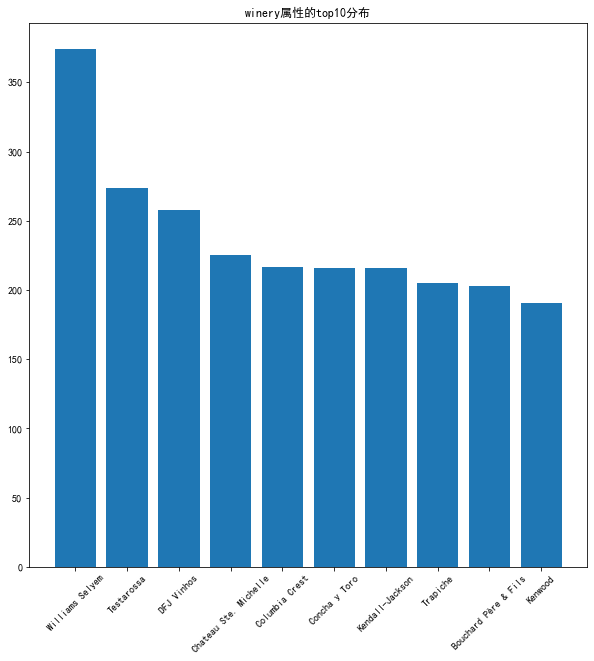

In [11]:
attribute = 'winery'
analyse_nominal_attribute(wine_review_dataset,attribute)

#### 1.2.3 数值属性数据摘要和可视化

**数值属性摘要**：考虑获得数值属性，用五数概括、均值、方差表示其数据摘要，并统计它的缺失值信息。

**数值属性可视化**：考虑获得的数值属性，使用散点图、直方图和盒图对数值属性数据进行可视化分析

**注**：考虑到可复用性，我们使用函数形式进行分析，定义函数`analyse_num_attribute`

In [12]:
def analyse_num_attribute(attribute, data):
    print(f'{attribute}的数据摘要')
    print(data[attribute].describe())
    print(f'{attribute}的数据散点图')
    plt.figure(figsize=(10, 10))
    sns.stripplot(y=data[attribute].dropna())
    plt.show()
    plt.figure(figsize=(10, 10))
    print(f'{attribute}的数据直方图')
    sns.distplot(data[attribute].dropna())
    plt.show()
    plt.figure(figsize=(10, 10))
    print(f'{attribute}的数据盒图')
    sns.boxplot(y=data[attribute].dropna())
    plt.show()

price的数据摘要
count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64
price的数据散点图


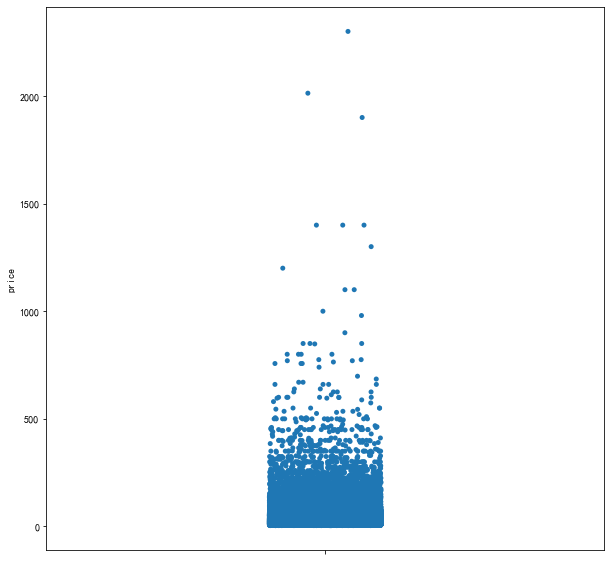

price的数据直方图


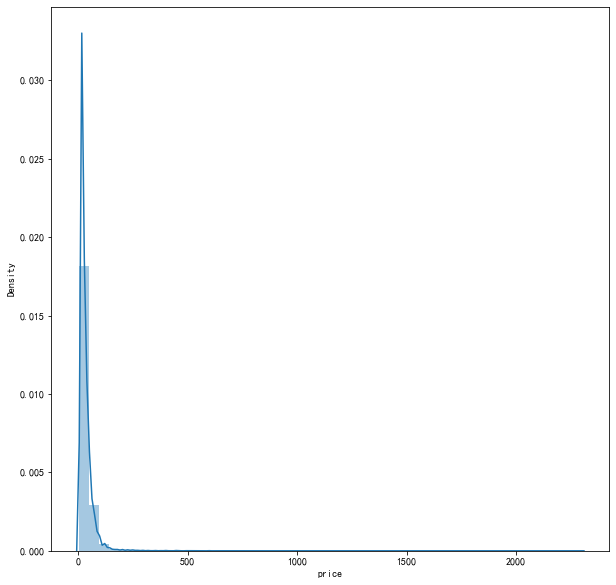

price的数据盒图


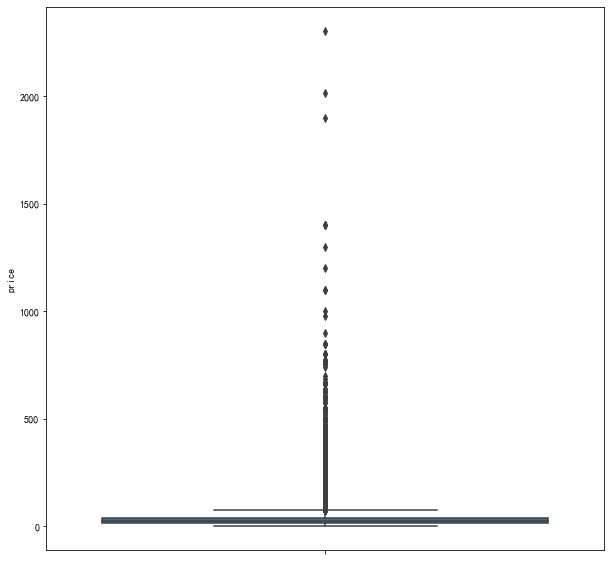

In [13]:
# price 属性的分析
analyse_num_attribute('price',wine_review_dataset)

根据price属性的散点图和直方图可以看出，大部分的数据集中于0到500的区间，而从盒图种可以看出，属性的离群点相对于数据集中区域的偏离度很大

points的数据摘要
count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64
points的数据散点图


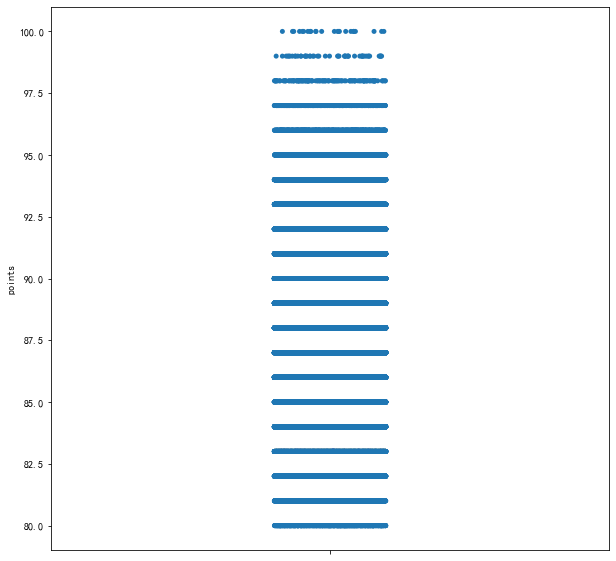

points的数据直方图


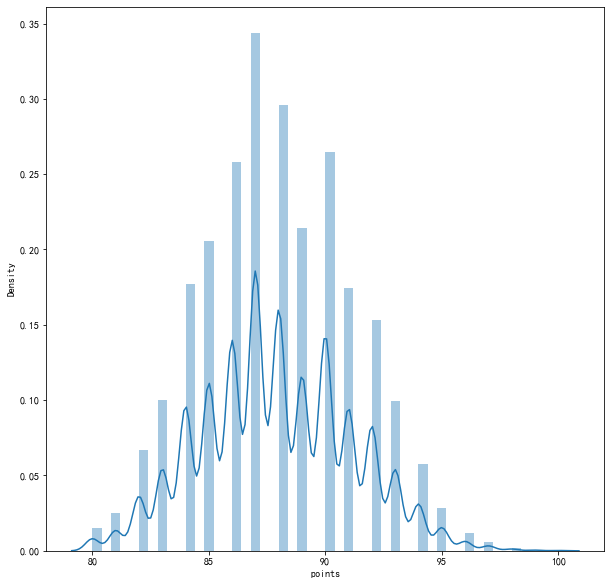

points的数据盒图


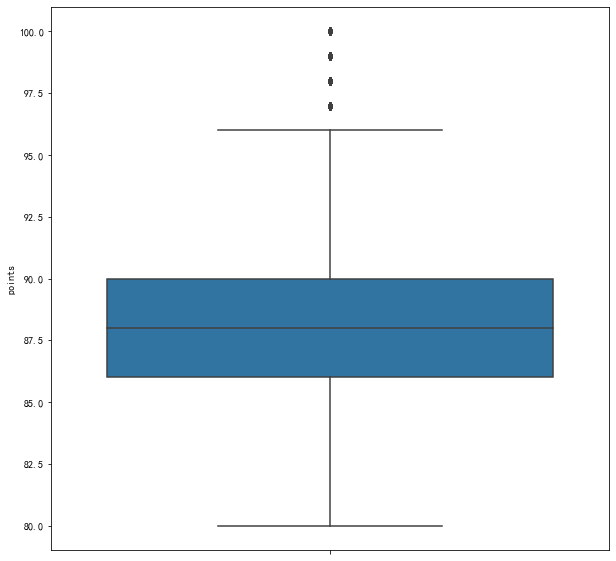

In [14]:
# points 属性的分析
analyse_num_attribute('points',wine_review_dataset)

根据point的散点图和直方图可以看出，点数评分比较均衡，整体呈现一个正态分布的情况，较符合数据统计意义；根据盒图可以看出，数据的离群点主要分布在点数较高的情况，离群距离不大

### 1.3 数据缺失的处理

在进行缺失数据处理之前，先整体概览一下缺失数据的数量

In [15]:
wine_review_dataset.isna().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

根据上述的数据展示显示，Unnamed、description、points、variety和winery不存在缺失数据，因此在数据缺失处理中不对这些属性进行分析处理。

针对缺失数据的处理方案，有四种处理的方案：

- 将缺失部分剔除
- 使用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

为了保证复用性，都采用函数的形式实现各种处理方法和可视化方法

**注**：通过属性相关性和数据对象相似性之间的关系需要属性值能够进行比较，因此不对标称属性进行两种方法的处理，仅对数值属性进行这两种方法的处理。

In [16]:
# 前后对比可视化函数
def compare(new_data, old_data, mode):
    figure, ax = plt.subplots(1, 2, figsize=(20, 10))
    figure.suptitle(new_data.name+'-'+mode, fontsize=50)
    # object or number
    if new_data.dtype is np.dtype('O'):
        # if the type is object
        # only show the top 10 item
        top = 10
        old_data = old_data.value_counts()
        old_top_value_list = list(old_data.index)[:top]
        ax[0].bar(old_top_value_list, old_data.iloc[:top])
        ax[0].set_title('Old-Histogram', fontsize=20)
        for tick in ax[0].get_xticklabels():
            tick.set_rotation(45)
            tick.set_fontsize(10)
        for tick in ax[0].get_yticklabels():
            tick.set_fontsize(20)
        new_data = new_data.value_counts()
        new_top_value_list = list(new_data.index)[:top]
        ax[1].bar(new_top_value_list, new_data.iloc[:top])
        ax[1].set_title('New-Histogram', fontsize=20)
        for tick in ax[1].get_xticklabels():
            tick.set_rotation(45)
            tick.set_fontsize(10)
        for tick in ax[1].get_yticklabels():
            tick.set_fontsize(20)
        plt.show()
    else:
        sns.distplot(old_data, ax=ax[0])
        for tick in ax[0].get_xticklabels():
            tick.set_fontsize(10)
        for tick in ax[0].get_yticklabels():
            tick.set_fontsize(10)
        ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=20)
        ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=20)
        sns.distplot(new_data, ax=ax[1])
        for tick in ax[1].get_xticklabels():
            tick.set_fontsize(10)
        for tick in ax[1].get_yticklabels():
            tick.set_fontsize(10)
        ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=20)
        ax[1].set_ylabel(ax[1].get_ylabel(), fontsize=20)

In [17]:
# 数据处理函数
def process_na(data, process_attribute, relevant_attribute=None):
    
    def drop_na(data):
        new_data = data.dropna()
        compare(new_data=new_data,old_data=data,mode='Drop')
    
    def fill_by_most(data):
        new_data = data.fillna(data.mode()[0])
        compare(new_data=new_data,old_data=data,mode='Fill-By-Most')
    
    def fill_by_relevance(data):
        from sklearn.linear_model import LinearRegression
        # model the relevance by linear regression
        data_c = data.copy()
        data_c = data_c[~data[process_attribute].isna()]
        X = np.array(data_c[relevant_attribute]).reshape(-1,1)
        Y = data_c[process_attribute].dropna()
        model = LinearRegression()
        model.fit(X,Y)
        new_data = data.copy()
        for index, row in new_data[new_data[process_attribute].isna()][~new_data[relevant_attribute].isna()].iterrows():
            if np.isnan(row[relevant_attribute]):
                row[process_attribute] = model.predict(np.array(row[relevant_attribute]).reshape(-1,1))
        # if relevant attribute and target attribute both is null
        # it shoulb be drop
        compare(new_data=new_data[process_attribute].dropna(),old_data=data[process_attribute],mode='Fill-By-Relevance')

    
    def fill_by_similarity(data):
        similar_attribute_value = set(data[data[process_attribute].isna()][~data[relevant_attribute].isna()][relevant_attribute].values)
        fill_value = {}
        # calculate the fill value which with the same relevant attribute
        for value in similar_attribute_value:
            similar_data = data[~data[process_attribute].isna()][data[relevant_attribute].isin([value])][process_attribute]
            fill_value[value] = similar_data.sum()/similar_data.count()
        new_data = data.copy()
        for index, row in new_data[new_data[process_attribute].isna()].iterrows():
            if fill_value.get(row[relevant_attribute]) is not None:
                row[process_attribute] = fill_value[row[relevant_attribute]]
        compare(new_data=new_data[process_attribute],old_data=data[process_attribute],mode='Fill-By-Similarity')
    
    if data[process_attribute].dtype is np.dtype('O'):
        # 对标称属性只进行剔除和高频替换
        data = data[process_attribute]
        drop_na(data)
        fill_by_most(data)
    else:
        drop_na(data[process_attribute])
        fill_by_most(data[process_attribute])
        fill_by_relevance(data)
        fill_by_similarity(data)

#### 1.3.1 country 缺失数据处理

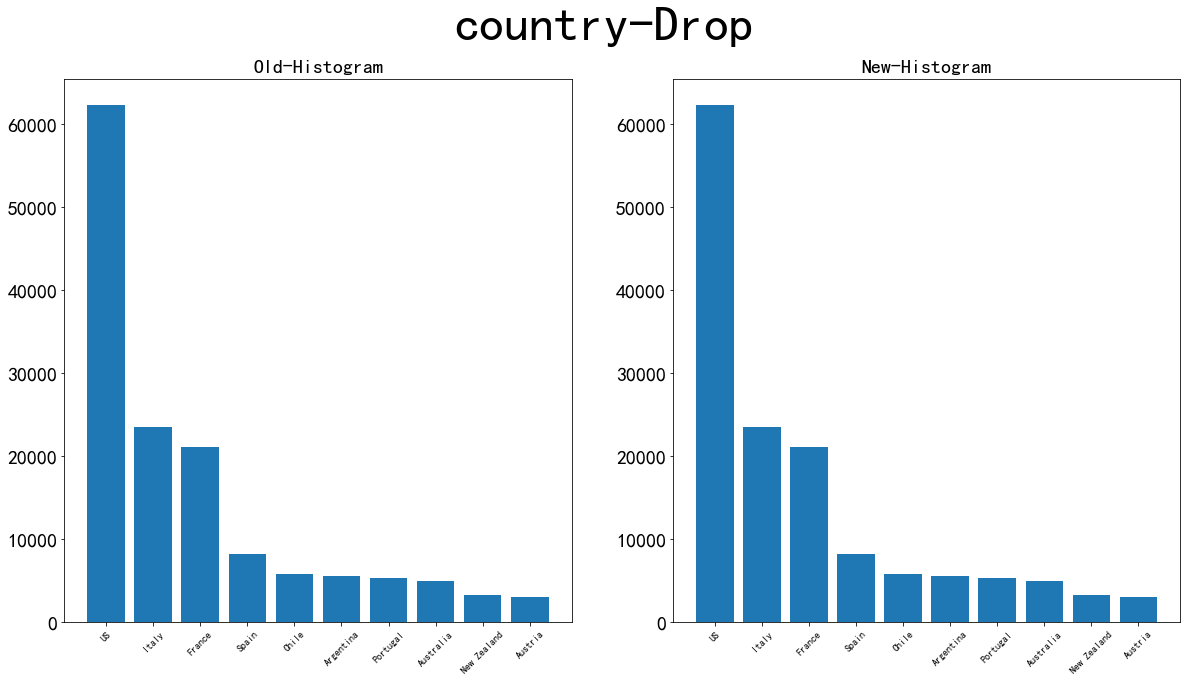

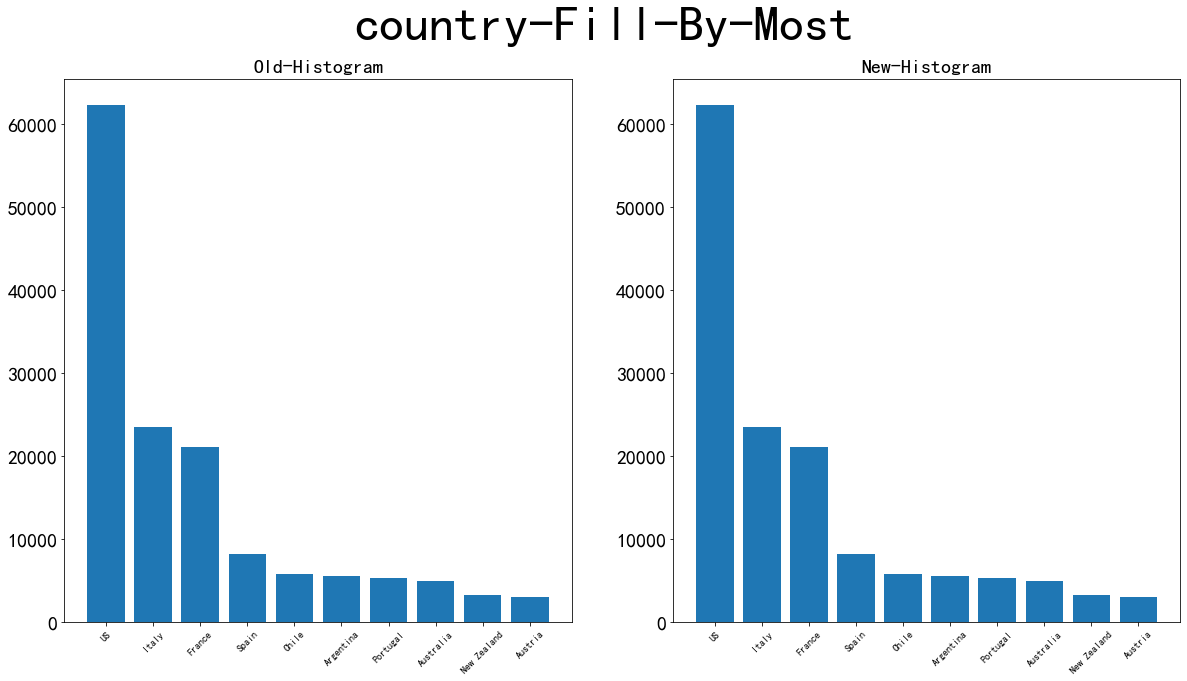

In [18]:
process_na(data=wine_review_dataset, process_attribute = 'country')

#### 1.3.2 designation 缺失数据处理

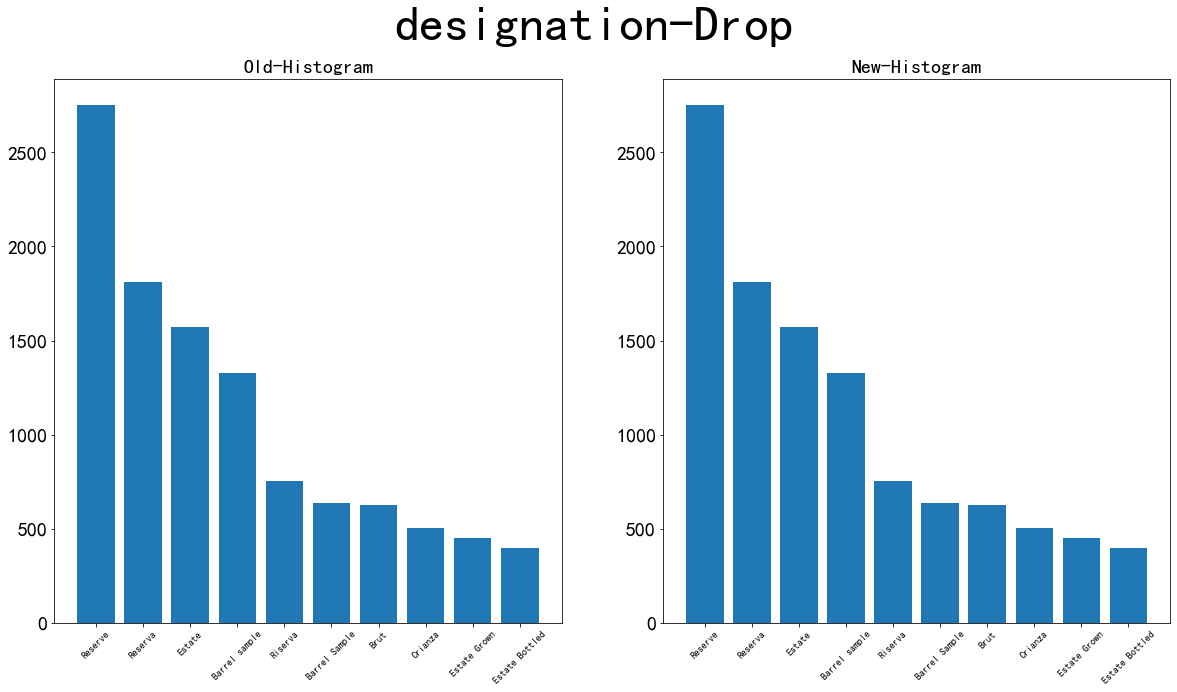

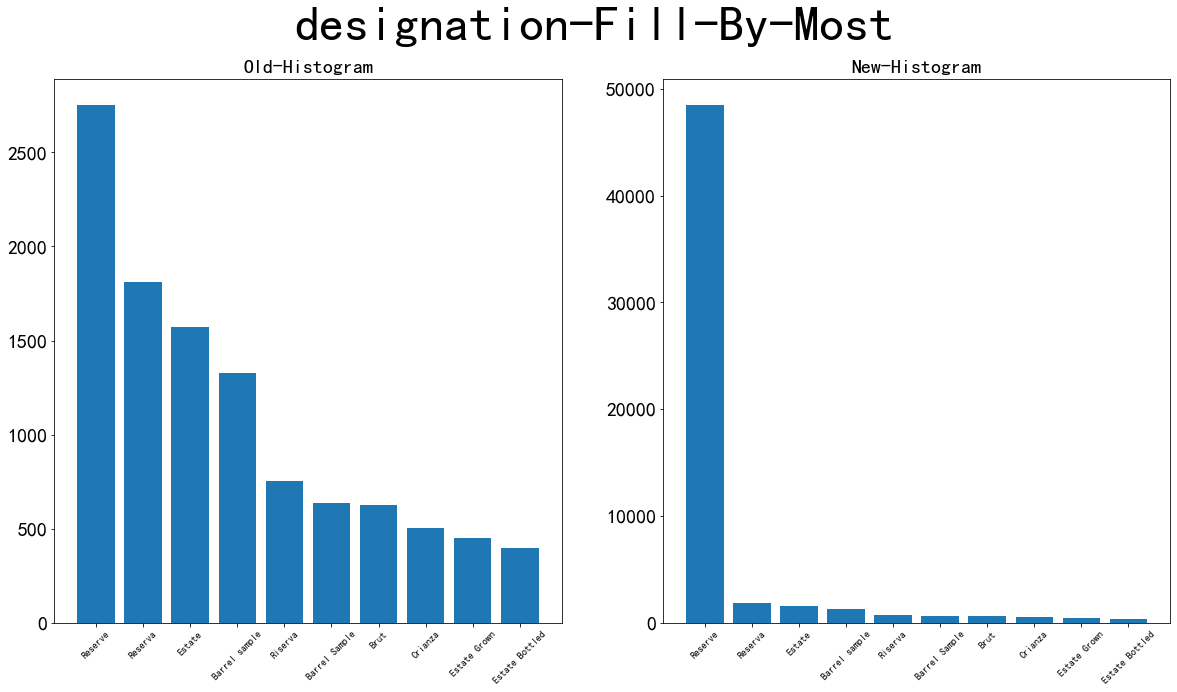

In [19]:
process_na(data=wine_review_dataset, process_attribute = 'designation')

#### 1.3.3 region_1 缺失数据处理

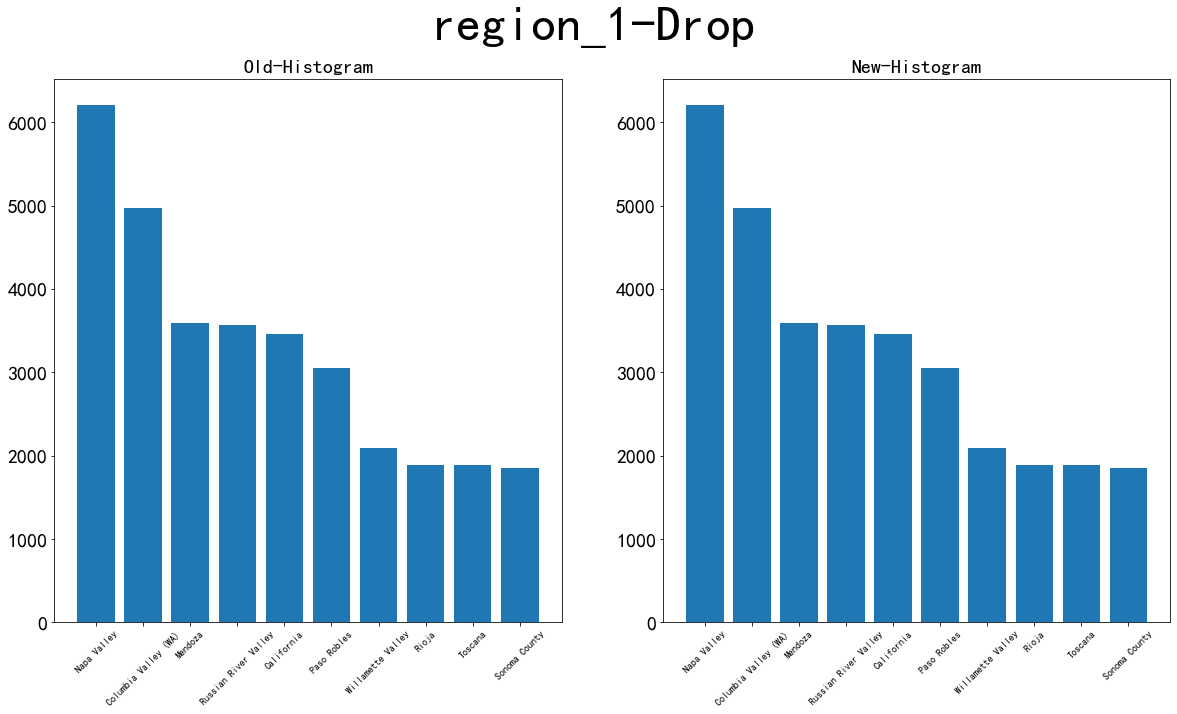

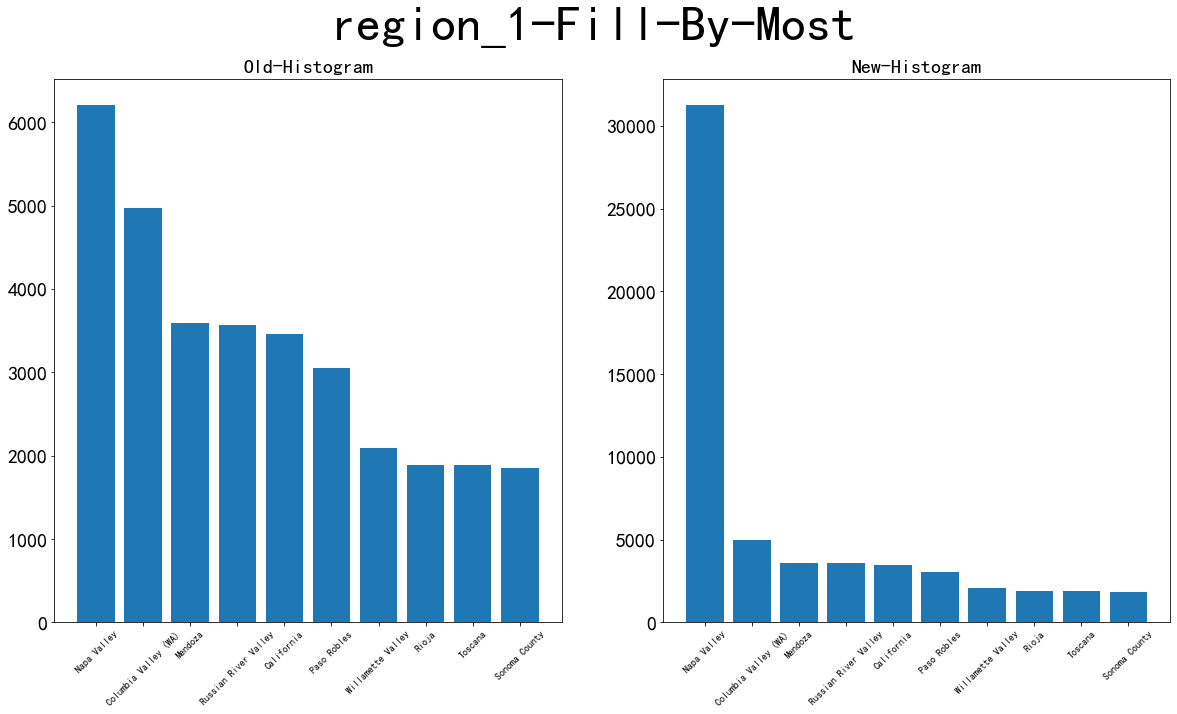

In [20]:
process_na(data=wine_review_dataset, process_attribute = 'region_1')

#### 1.3.4 region_2 缺失数据处理

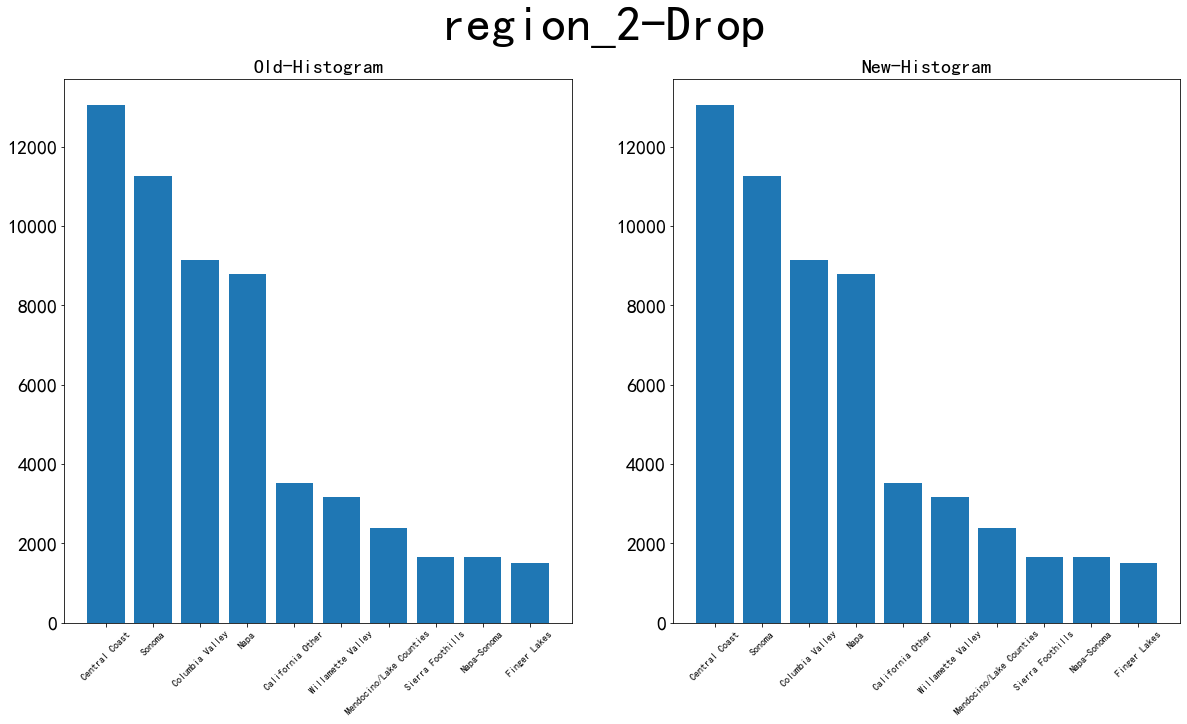

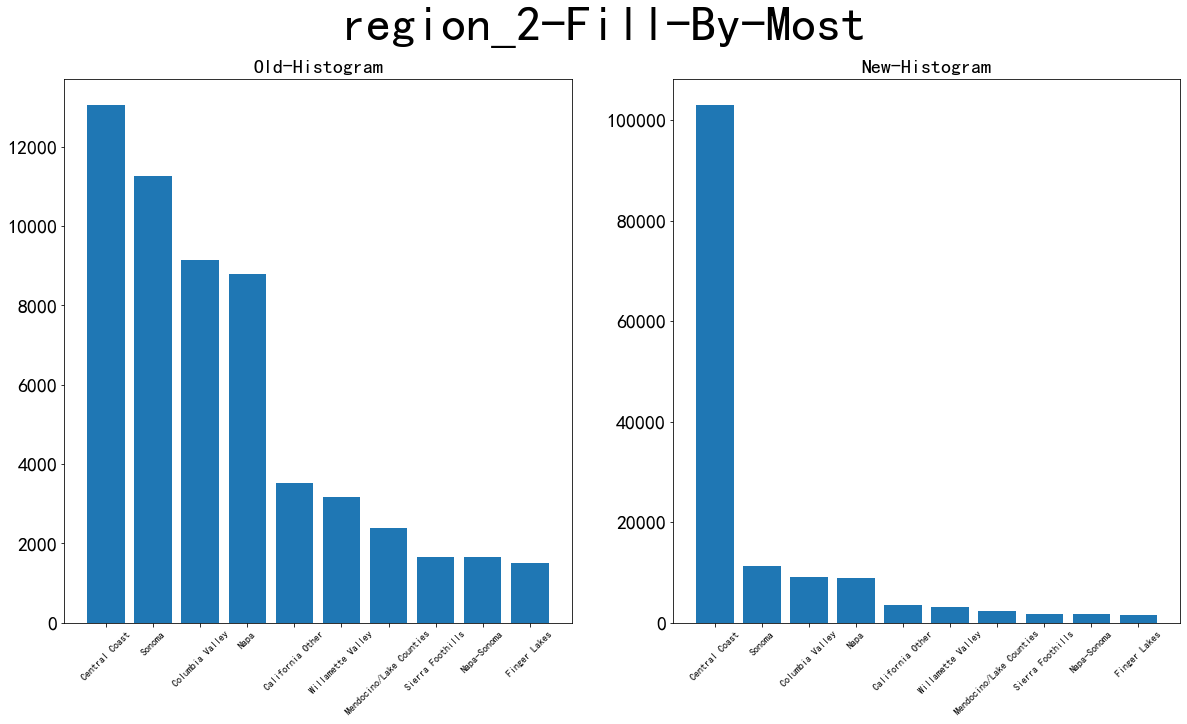

In [21]:
process_na(data=wine_review_dataset, process_attribute = 'region_2')

#### 1.3.5 price 缺失数据处理

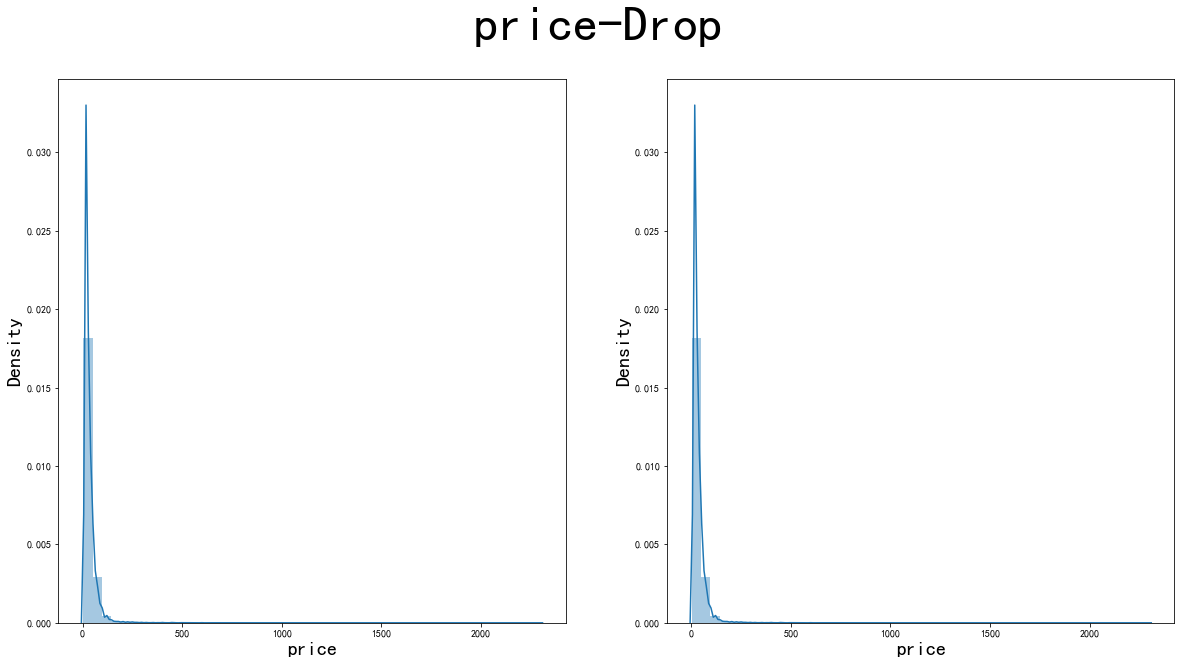

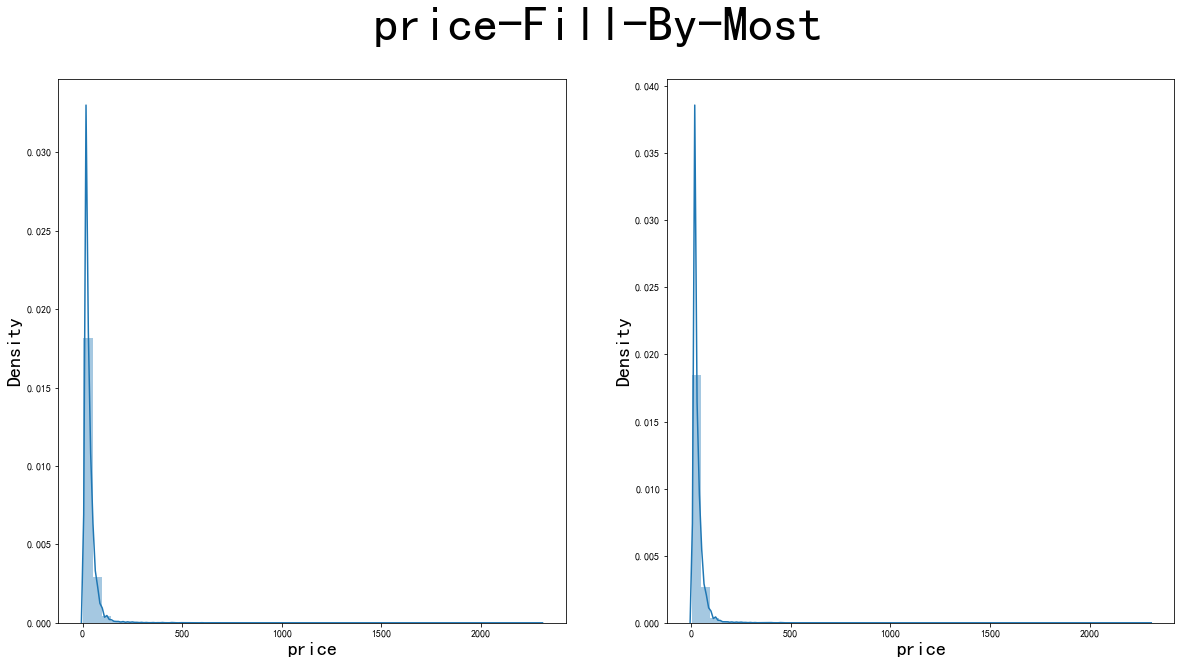

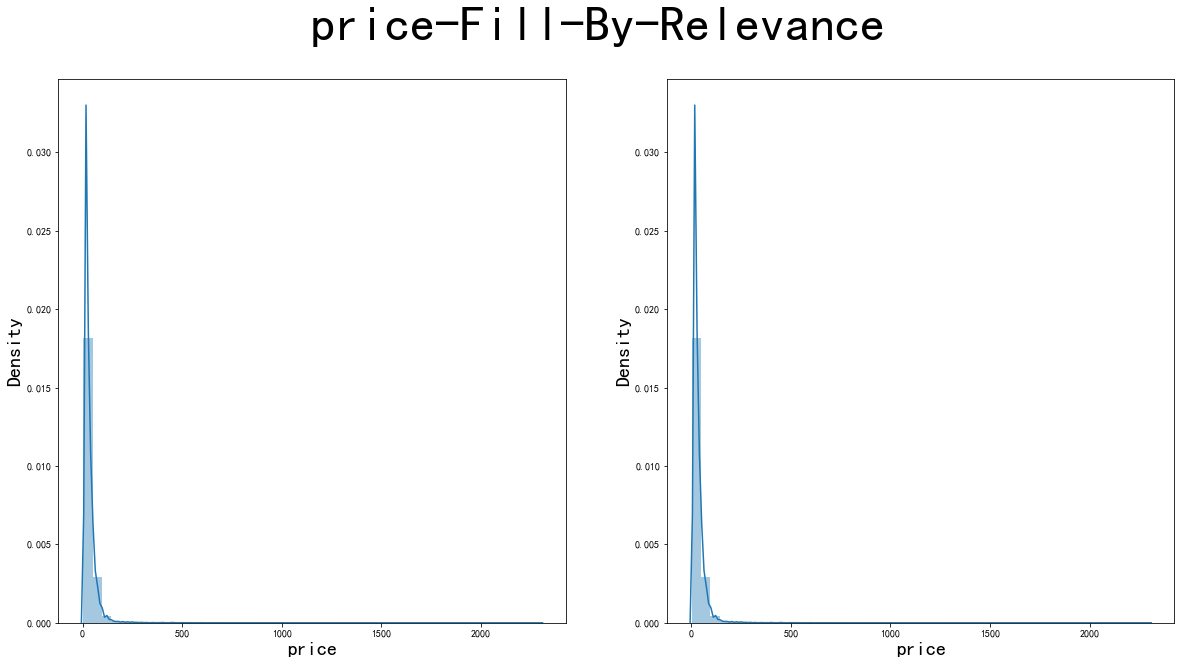

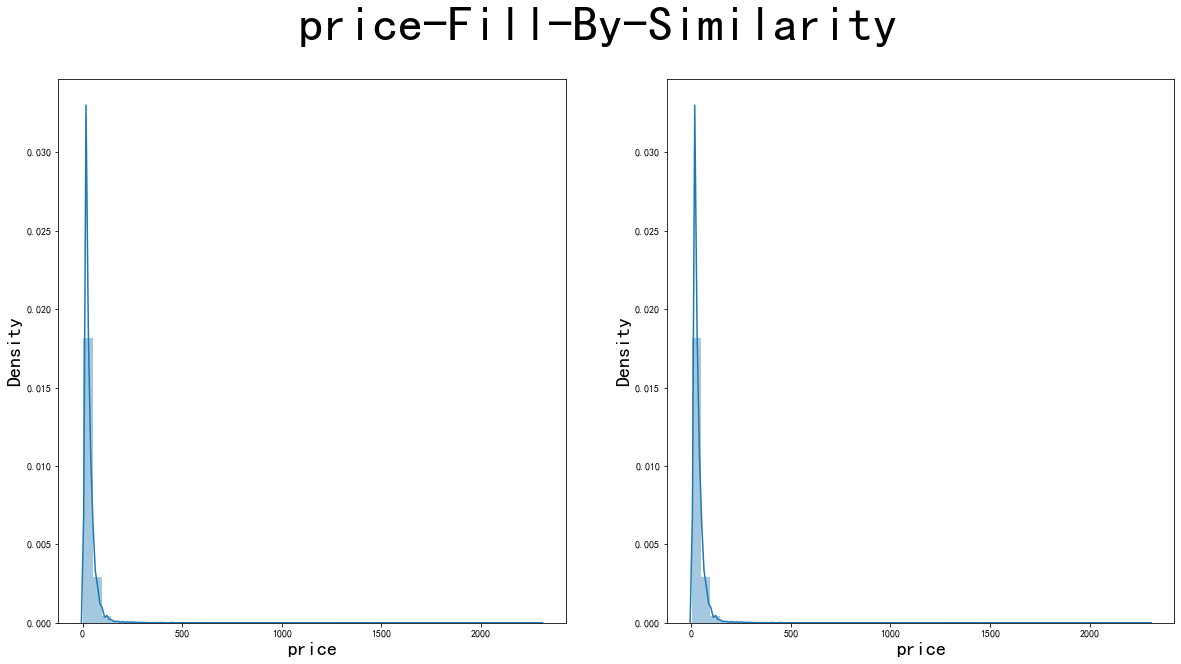

In [22]:
process_na(data=wine_review_dataset, process_attribute='price', relevant_attribute='points')

## 2. 数据分析之MLB Pitch Data 2015-2018
### 2.1 数据加载

In [23]:
atbats_dataset = pd.read_csv('atbats.csv')
ejections_dataset = pd.read_csv('ejections.csv')
games_dataset = pd.read_csv('games.csv')
pitches_dataset = pd.read_csv('pitches.csv')
player_names_dataset = pd.read_csv('player_names.csv')

### 2.2 数据可视化和摘要
#### 2.2.1 数据信息概览

In [24]:
print('atbasts')
print(atbats_dataset.dtypes.value_counts(),'\n')
atbats_dataset.head()

atbasts
int64     7
object    3
bool      1
dtype: int64 



,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


In [25]:
print('ejections')
print(ejections_dataset.dtypes.value_counts(),'\n')
ejections_dataset.head()

ejections
object    5
int64     4
bool      1
dtype: int64 



,ab_id,des,event_num,g_id,player_id,date,BS,CORRECT,team,is_home_team
0,2015003219,San Diego Padres center fielder Will Venable e...,732,201500044,461416,4/9/15,NaN,NaN,sdn,True
1,2015003219,San Diego Padres Manager Bud Black ejected by ...,734,201500044,111034,4/9/15,NaN,NaN,sdn,True
2,2015004134,Milwaukee Brewers second baseman Scooter Genne...,584,201500055,571697,4/10/15,Y,C,mil,True
3,2015006692,Cincinnati Reds Manager Bryan Price ejected by...,557,201500088,427406,4/12/15,NaN,NaN,cin,True
4,2015008446,Pittsburgh Pirates Manager Clint Hurdle ejecte...,402,201500111,116346,4/14/15,Y,I,pit,True


In [26]:
print('games')
print(games_dataset.dtypes.value_counts(),'\n')
games_dataset.head()

games
object    11
int64      6
dtype: int64 



,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


In [27]:
print('pitches')
print(pitches_dataset.dtypes.value_counts(),'\n')
pitches_dataset.head()

pitches
float64    36
object      3
int64       1
dtype: int64 



,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [28]:
print('player_names')
print(player_names_dataset.dtypes.value_counts(),'\n')
player_names_dataset.head()

player_names
object    2
int64     1
dtype: int64 



,id,first_name,last_name
0,452657,Jon,Lester
1,425794,Adam,Wainwright
2,457435,Phil,Coke
3,435400,Jason,Motte
4,519166,Neil,Ramirez


可以看出，数据集中：
- `atbats`含有3个标称属性，8个数值属性
- `ejections`含有4个标称属性，37个数值属性
- `games`含有11个标称属性，6个数值属性
- `pitches`含有3个标称属性，37个数值属性
- `player_names`含有2个标称属性，1个数值属性

结合属性的含义，为了避免过多地分析浪费资源，在这里选择如下几个具有统计意义的属性进行分析：

- 标称属性选择
  - `atbats`中的`event`属性
  
- 数值属性选择
  - `ejections`中的`event_num`属性
  - `games`中的`away_final_score`属性
  - `pitches`中的`start_speed`属性
  


#### 2.2.2 标称属性数据摘要和可视化

属性：event
属性值有30种，其中top10种为 Strikeout, Groundout, Single, Flyout, Walk, Lineout, Pop Out, Double, Home Run, Forceout
把这些属性的频次展示如下
               数量        频次
Strikeout  157128  0.212224
Groundout  134893  0.182192
Single     108794  0.146942
Flyout      80731  0.109039
Walk        56894  0.076843
Lineout     44934  0.060690
Pop Out     34455  0.046536
Double      33157  0.044783
Home Run    22209  0.029996
Forceout    15112  0.020411
把这些属性的统计分布展示如下


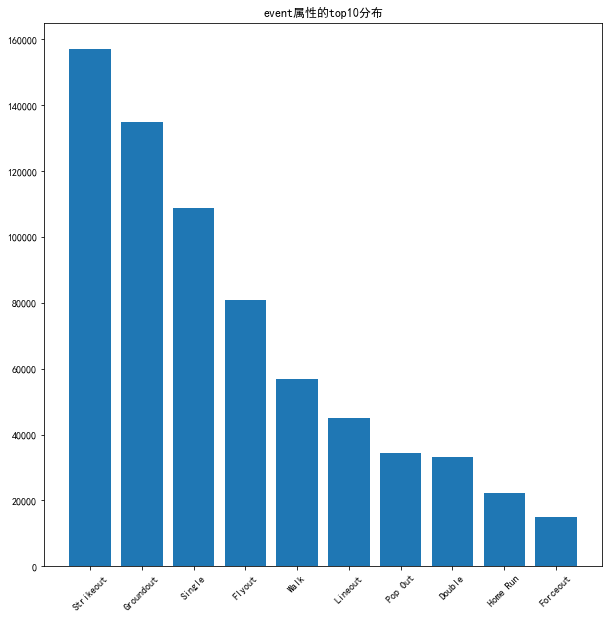

In [29]:
attribute = 'event'
analyse_nominal_attribute(atbats_dataset, attribute)

#### 2.2.3 数值属性数据摘要和可视化

event_num的数据摘要
count     761.000000
mean      399.948752
std       180.921999
min         4.000000
25%       264.000000
50%       413.000000
75%       527.000000
max      1065.000000
Name: event_num, dtype: float64
event_num的数据散点图


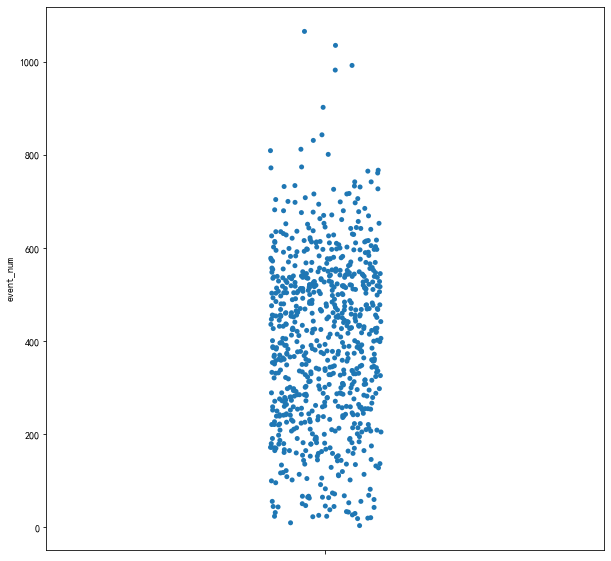

event_num的数据直方图


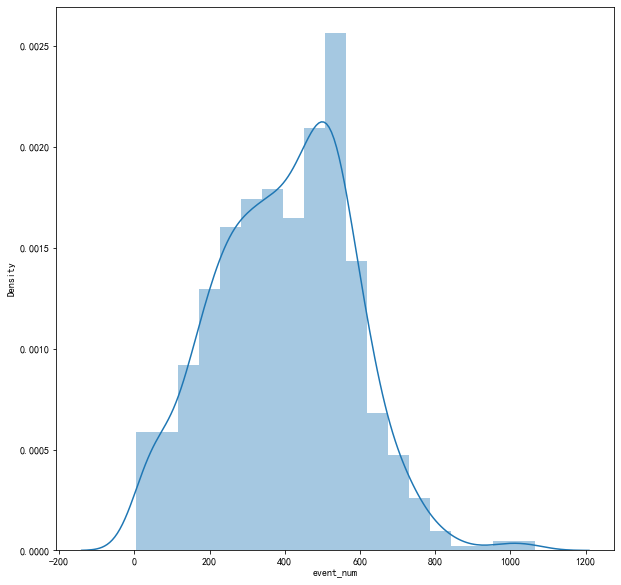

event_num的数据盒图


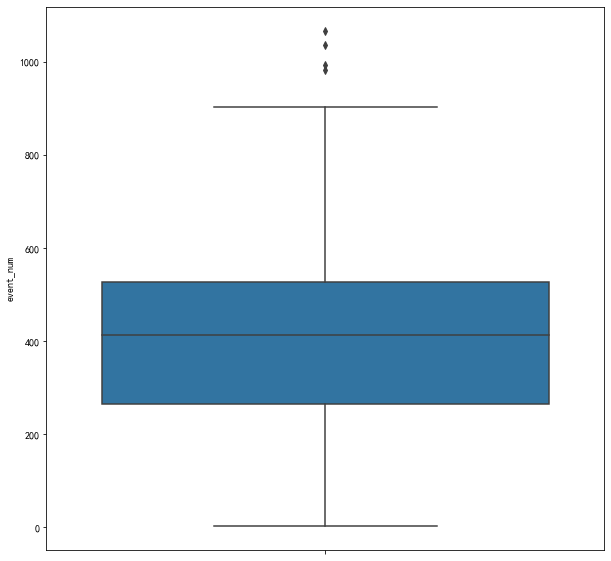

In [30]:
analyse_num_attribute('event_num', ejections_dataset)

away_final_score的数据摘要
count    9718.000000
mean        4.371887
std         3.145571
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        24.000000
Name: away_final_score, dtype: float64
away_final_score的数据散点图


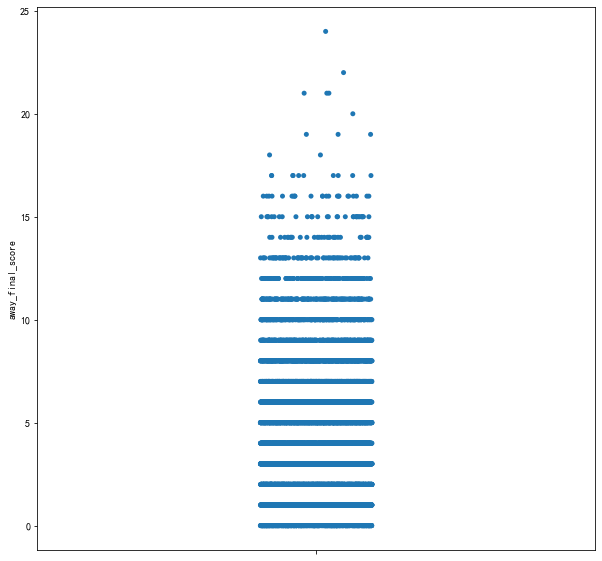

away_final_score的数据直方图


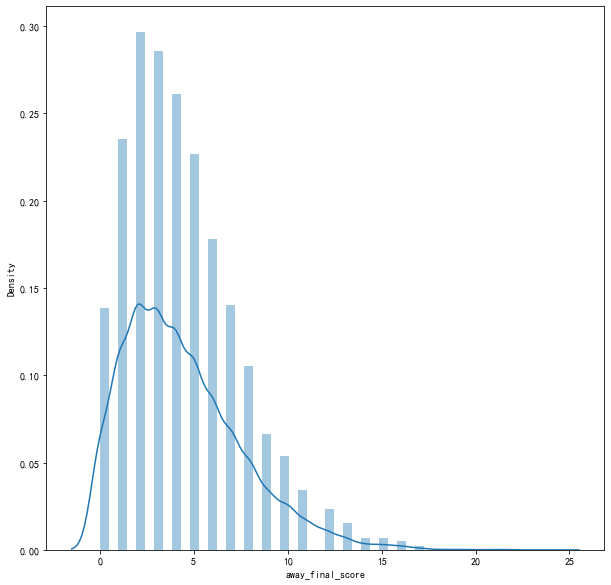

away_final_score的数据盒图


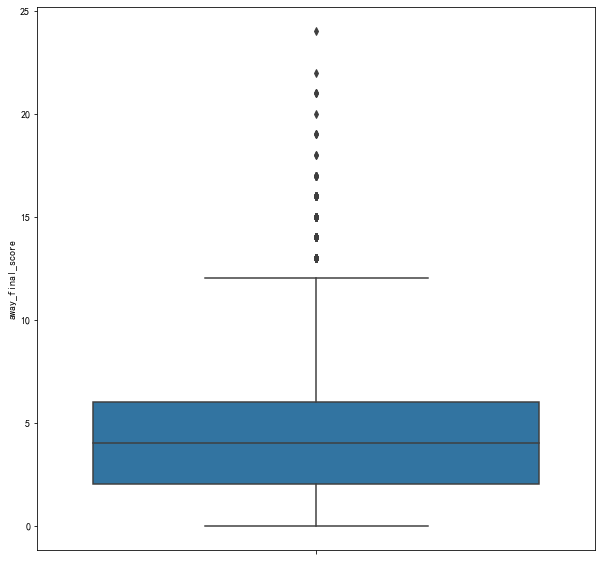

In [31]:
analyse_num_attribute('away_final_score', games_dataset)

start_speed的数据摘要
count    2.853040e+06
mean     8.838124e+01
std      6.015540e+00
min      3.390000e+01
25%      8.430000e+01
50%      8.970000e+01
75%      9.300000e+01
max      1.050000e+02
Name: start_speed, dtype: float64
start_speed的数据散点图


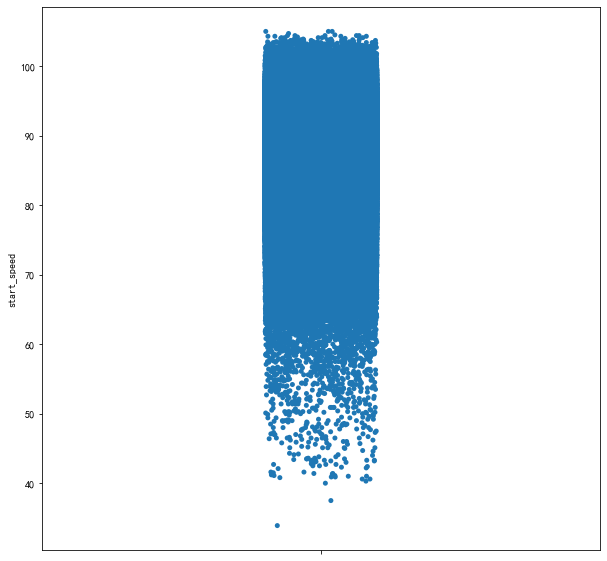

start_speed的数据直方图


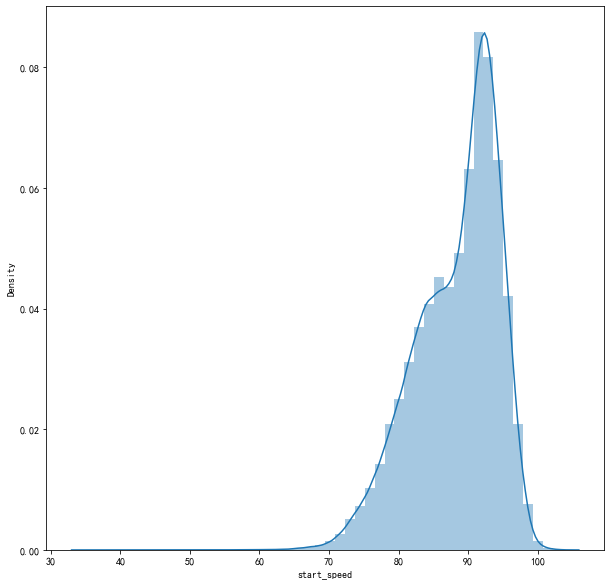

start_speed的数据盒图


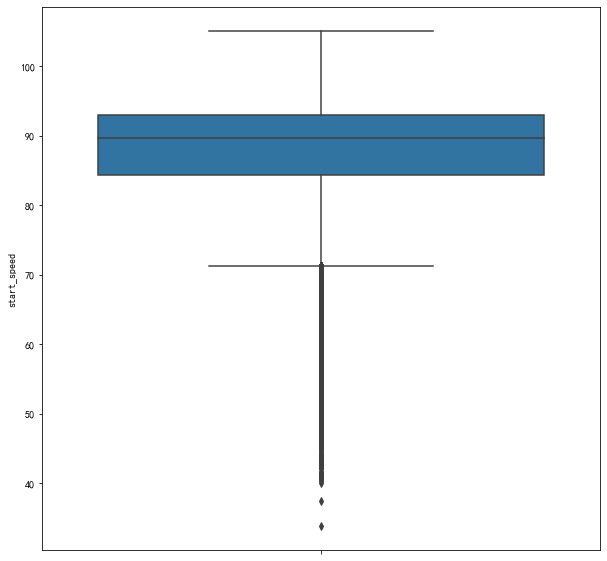

In [32]:
analyse_num_attribute('start_speed', pitches_dataset)

### 2.3 数据缺失处理
在处理确实数据之前，先概览一下缺失数据的数量

In [33]:
print('atbats_dataset')
atbats_dataset.isna().sum()

atbats_dataset


ab_id         0
batter_id     0
event         0
g_id          0
inning        0
o             0
p_score       0
p_throws      0
pitcher_id    0
stand         0
top           0
dtype: int64

In [34]:
print('ejections_dataset')
ejections_dataset.isna().sum()

ejections_dataset


ab_id             0
des               0
event_num         0
g_id              0
player_id         0
date              0
BS              366
CORRECT         366
team              0
is_home_team      0
dtype: int64

In [35]:
print('pitches_dataset')
pitches_dataset.isna().sum()

pitches_dataset


px                 14189
pz                 14189
start_speed        14114
end_speed          14114
spin_rate          14189
spin_dir           14189
break_angle        14189
break_length       14189
break_y            14189
ax                 14189
ay                 14189
az                 14189
sz_bot              2083
sz_top              2083
type_confidence    14189
vx0                14189
vy0                14189
vz0                14189
x                      0
x0                 14189
y                      0
y0                 14189
z0                 14189
pfx_x              14142
pfx_z              14142
nasty              14189
zone               14189
code                5719
type                   0
pitch_type         14189
event_num              0
b_score                0
ab_id                  0
b_count                0
s_count                0
outs                   0
pitch_num              0
on_1b                  0
on_2b                  0
on_3b                  0


In [36]:
print('games_dataset')
games_dataset.isna().sum()

games_dataset


attendance          0
away_final_score    0
away_team           0
date                0
elapsed_time        0
g_id                0
home_final_score    0
home_team           0
start_time          0
umpire_1B           0
umpire_2B           3
umpire_3B           0
umpire_HP           0
venue_name          0
weather             0
wind                0
delay               0
dtype: int64

In [37]:
print('player_names')
player_names_dataset.isna().sum()

player_names


id            0
first_name    0
last_name     0
dtype: int64

从上面的结果可以看出，数据集中的缺失数据较少，我们选取以下几个具有缺失数据且具有统计意义（对于数值属性还需要能够找到相关属性）的属性进行处理：

- 标称属性
  - `ejections`的`CORRECT`属性
  
- 数值属性
  - `pitches`的`end_speed`属性，相关属性为`start_speed`
  - `games`的`away_final_score`属性，相关属性为`elapsed_time`

#### 2.3.1 对ejections CORRECT缺失数据的处理

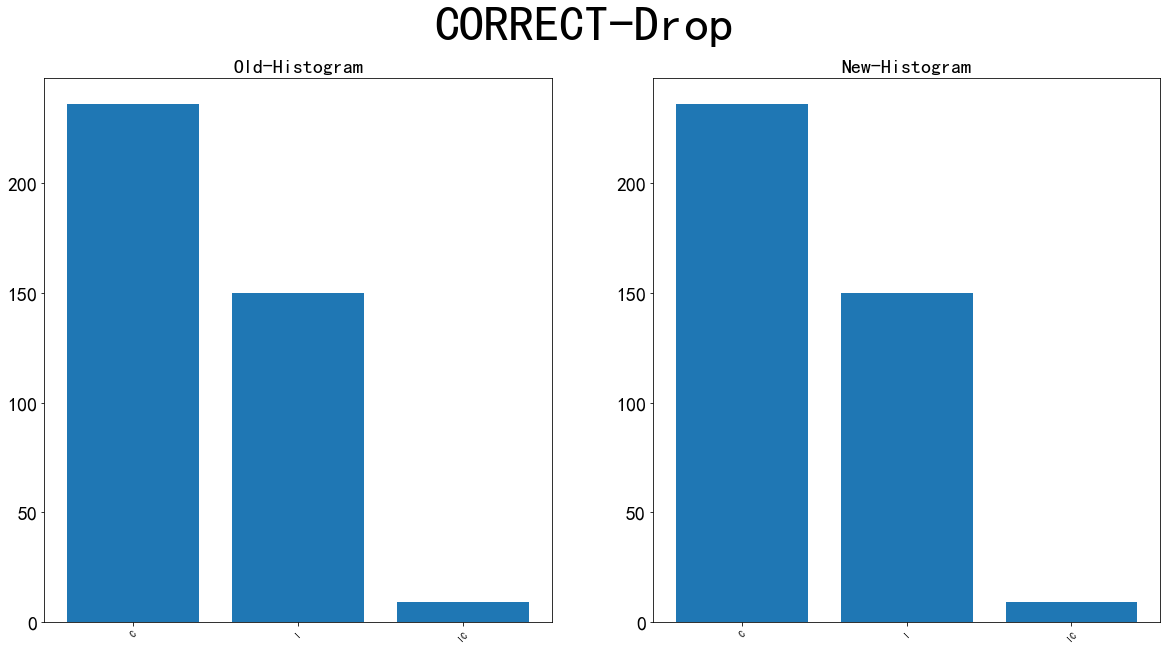

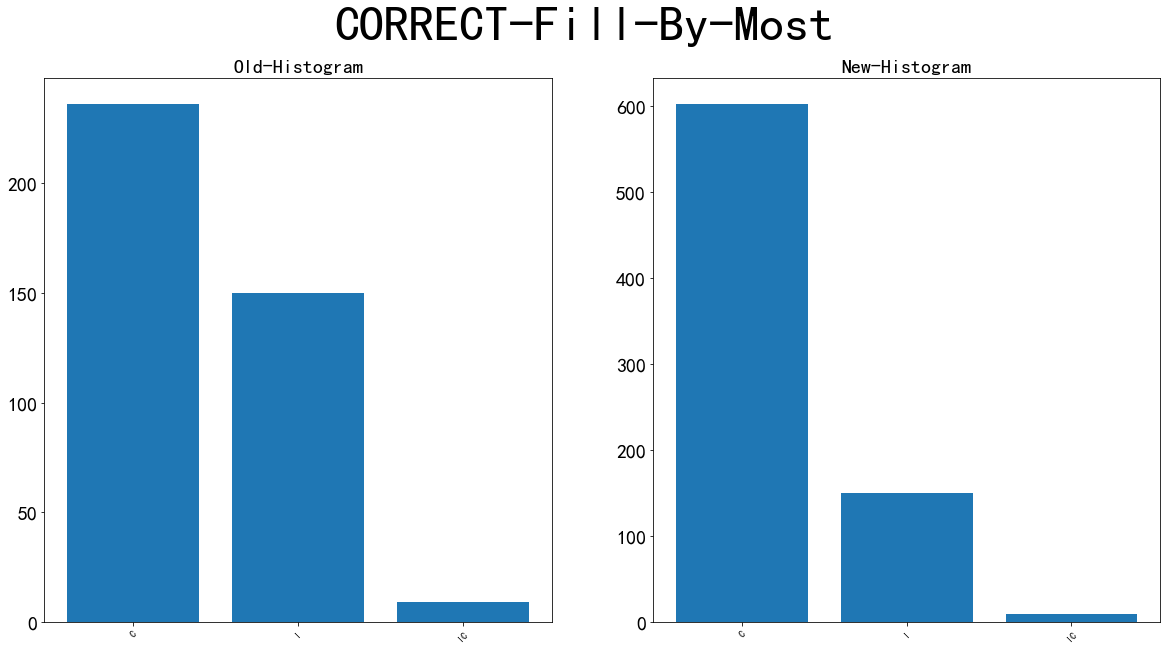

In [38]:
process_na(data=ejections_dataset, process_attribute='CORRECT')

#### 2.3.2 对pitches end_speed缺失数据的处理

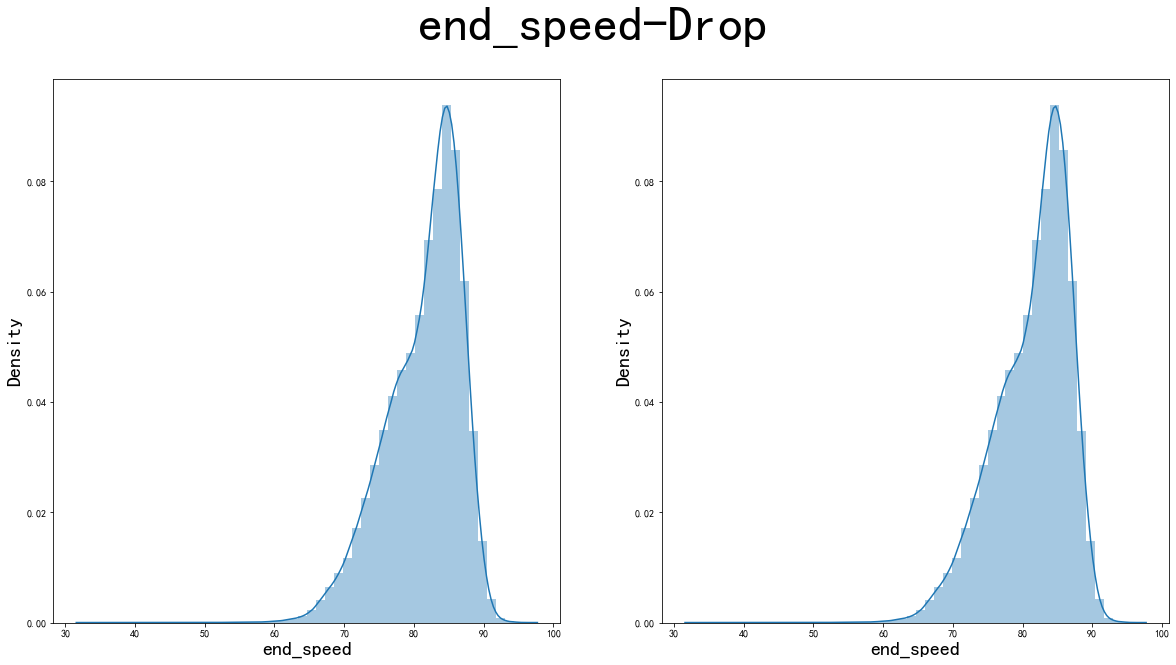

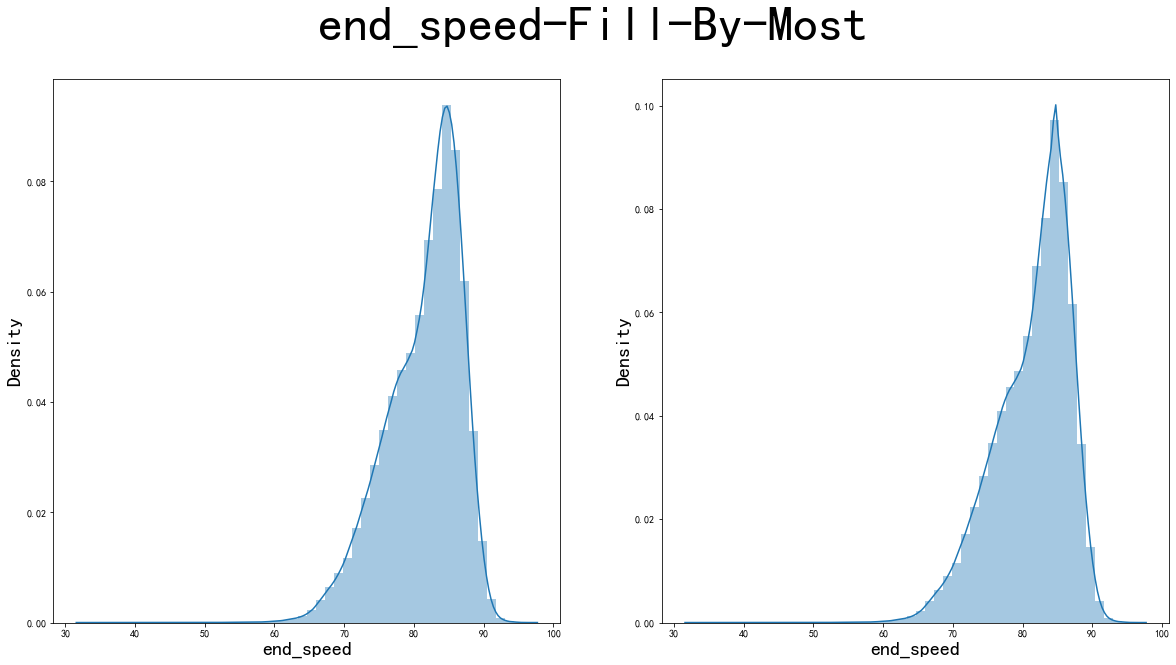

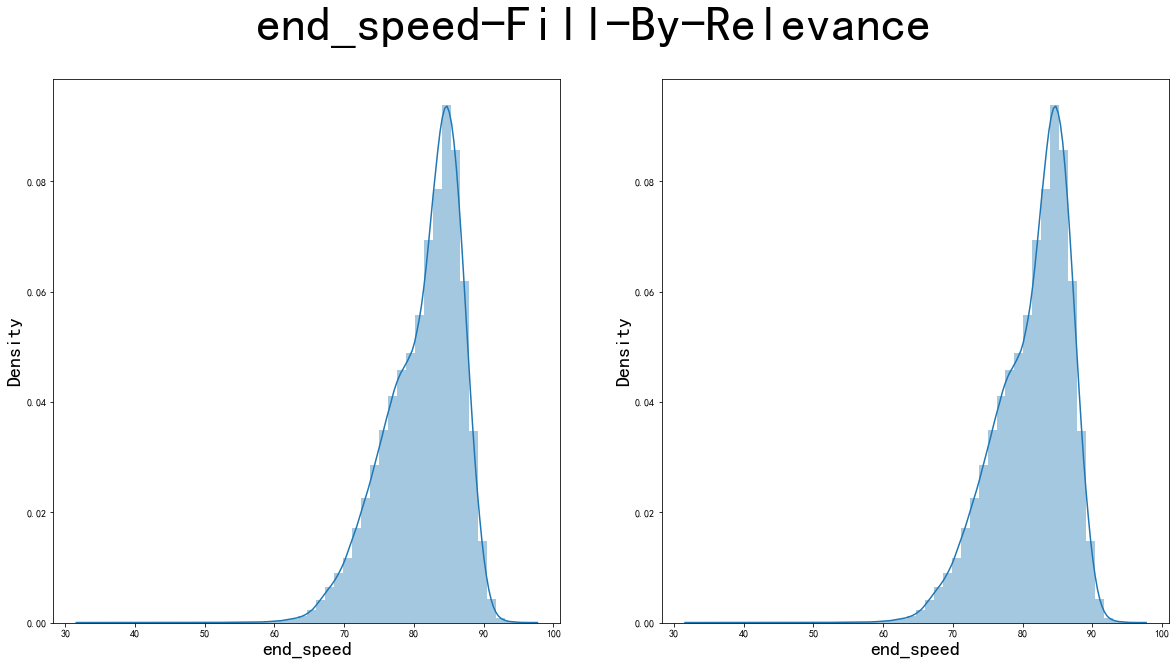

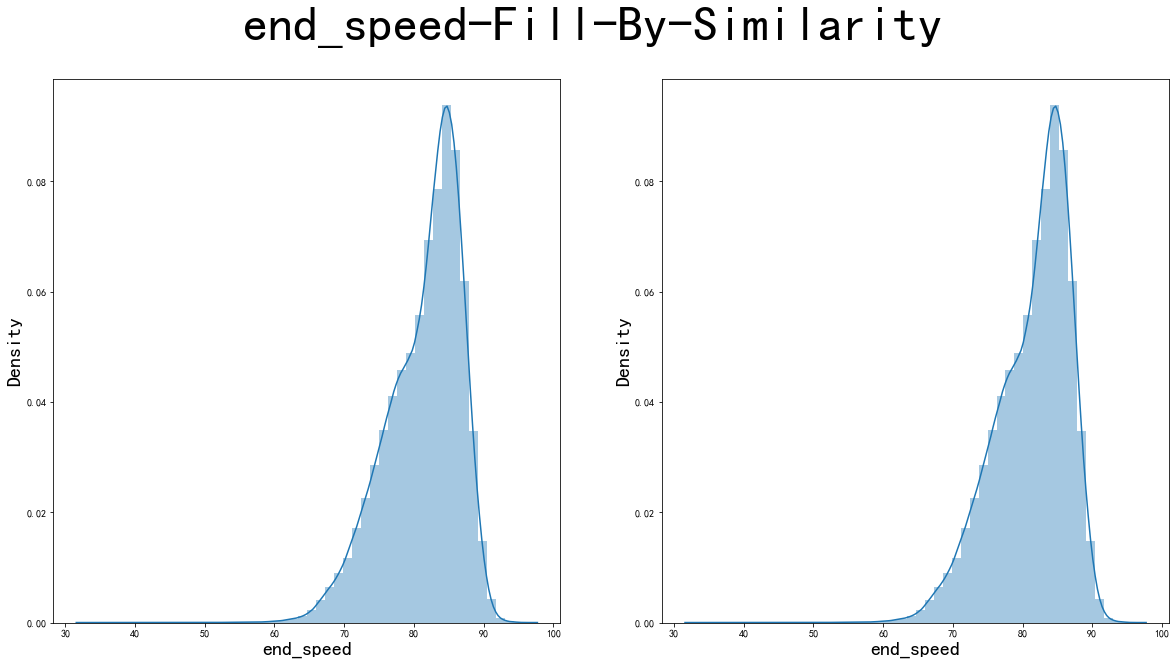

In [39]:
process_na(data=pitches_dataset,process_attribute='end_speed',relevant_attribute='start_speed')

#### 2.3.3 对games away_final_score缺失数据对处理

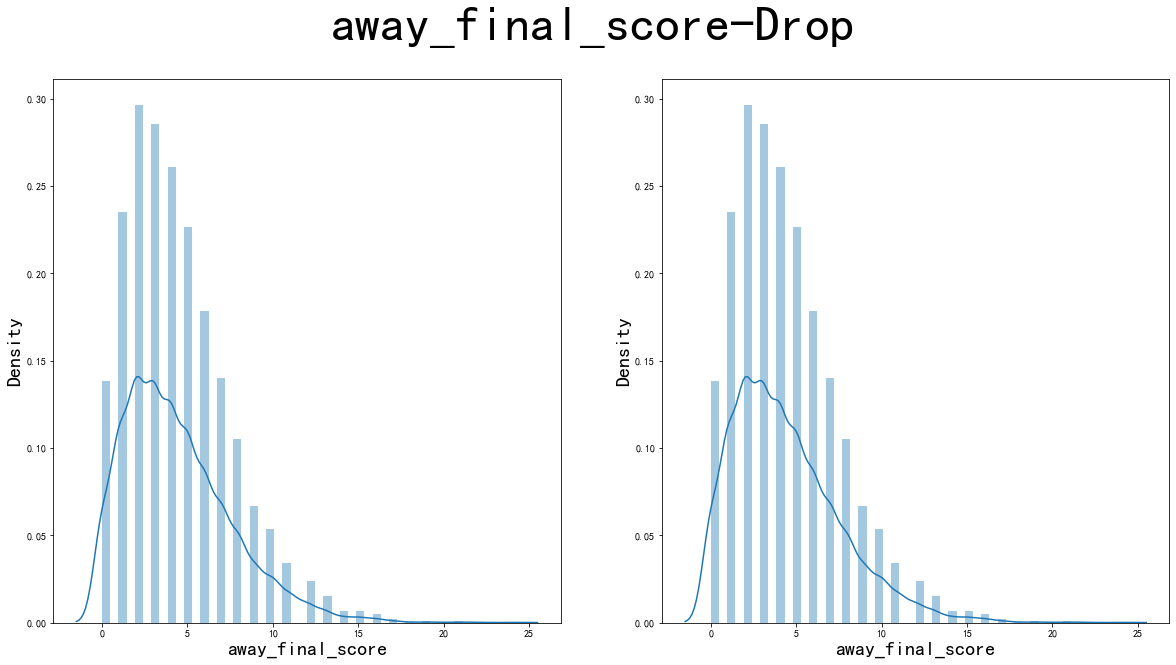

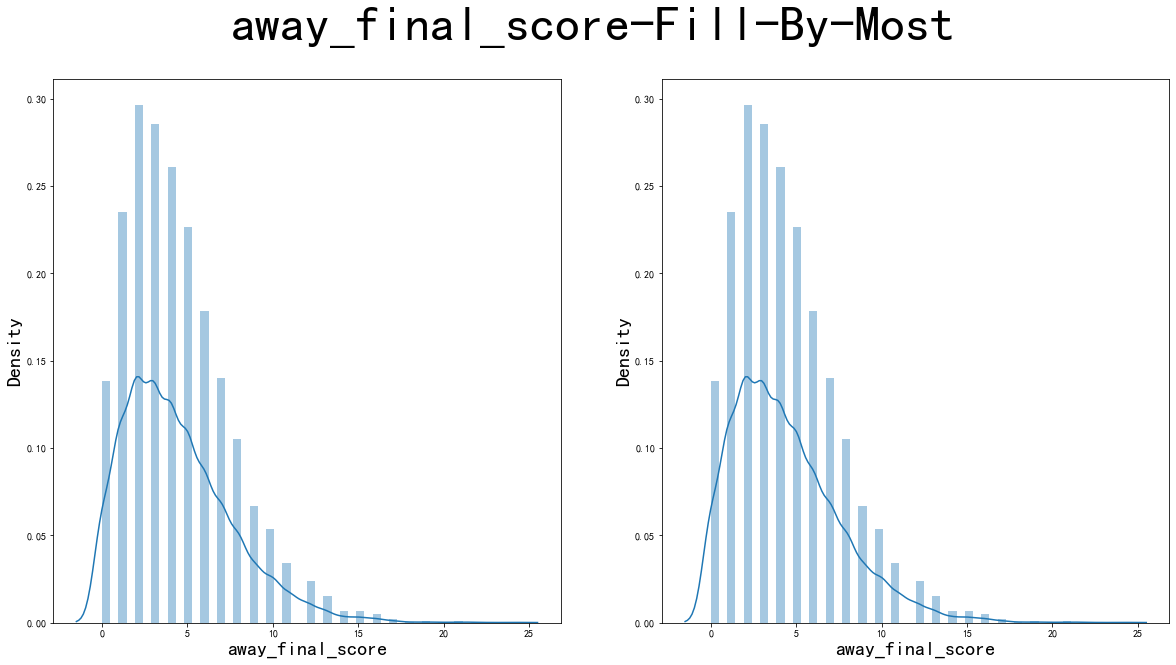

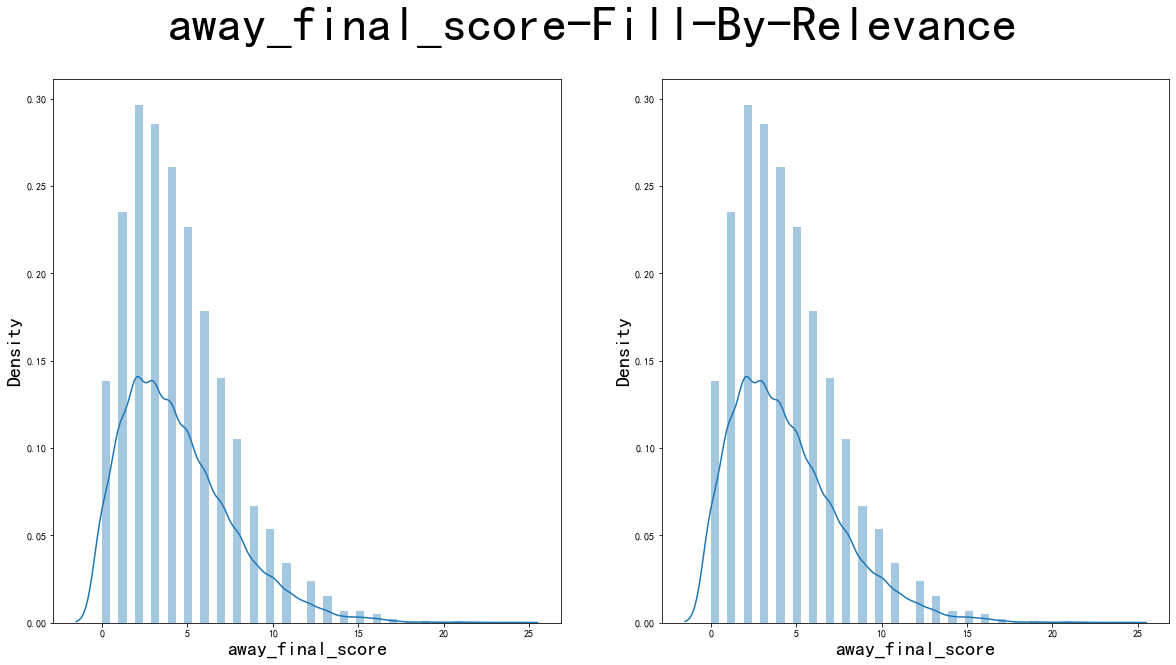

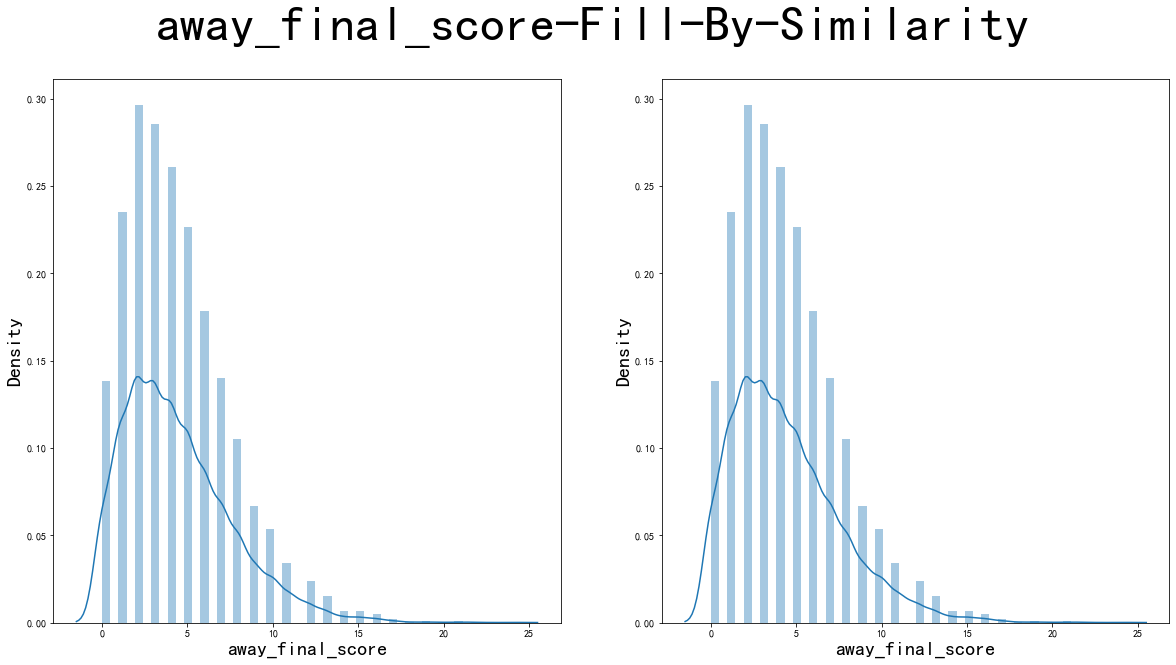

In [40]:
process_na(data=games_dataset,process_attribute='away_final_score',relevant_attribute='elapsed_time')